# Библиотеки

In [15]:
from ultralytics import YOLO
from PIL import Image
from patched_yolo_infer import (
    MakeCropsDetectThem,
    CombineDetections,
    visualize_results_usual_yolo_inference,
    visualize_results,
)

import cv2
import matplotlib.pyplot as plt

from Module.showInferensModel import load_labels, plot_image_with_boxes

# Константы

In [16]:
PATH_BEST = '../Weightts/yolov8s_100_aug.pt'
PATH_TEST_IMAGES = './DataSet/MyData/Test/images'
PATH_TEST_LABELS = './DataSet/MyData/Test/labels'
SAVE_RESULT = './Result/'

In [42]:
model = YOLO(PATH_BEST)

# На фотографии


image 1/1 d:\Nsu\SearchPersonAI\AI\DataSet\MyData\Test\images\45.jpg: 480x640 (no detections), 180.5ms
Speed: 7.0ms preprocess, 180.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


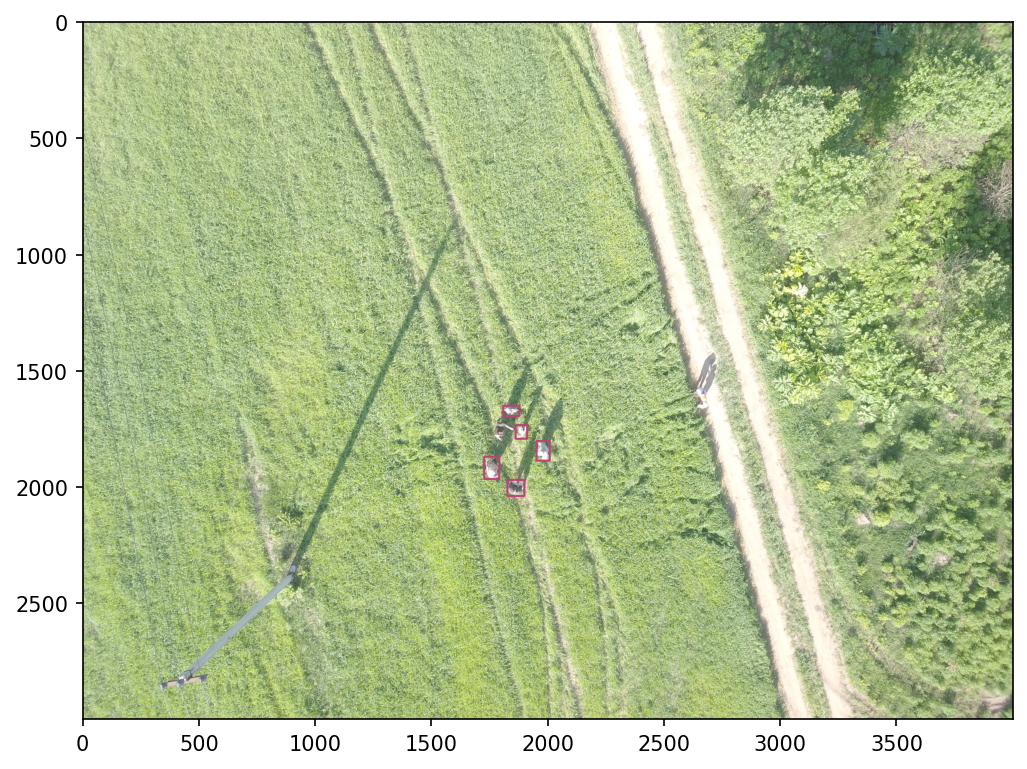

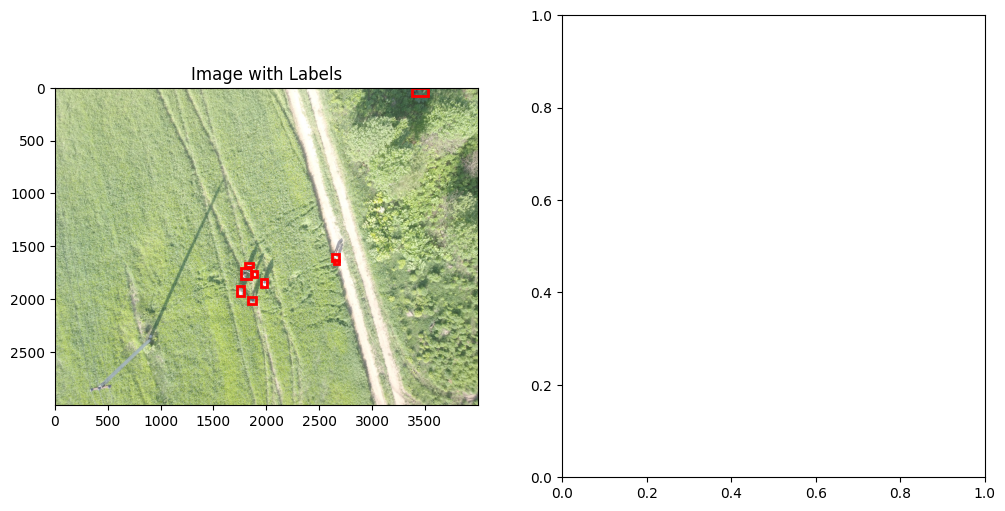

In [48]:
NAME = '45'
results = model(f'{PATH_TEST_IMAGES}/{NAME}.jpg')  # Замените на путь к вашему изображению
img = cv2.imread(f'{PATH_TEST_IMAGES}/{NAME}.jpg')

element_crops = MakeCropsDetectThem(
    image=img,
    model_path=PATH_BEST,
    segment=False,
    show_crops=False,
    shape_x=640,
    shape_y=640,
    overlap_x=5,
    overlap_y=5,
    conf=0.5,
    iou=0.7,
    classes_list=[0],
)
result = CombineDetections(element_crops, nms_threshold=0.1)
visualize_results(
    img=result.image,
    confidences=result.filtered_confidences,
    boxes=result.filtered_boxes,
    classes_ids=result.filtered_classes_id,
    classes_names=result.filtered_classes_names,
    thickness=8,
    show_boxes=True,
    delta_colors=3,
    show_class=False,
    axis_off=False
)

img = Image.open(f'{PATH_TEST_IMAGES}/{NAME}.jpg')
labels = load_labels(f'{PATH_TEST_LABELS}/{NAME}.txt')

# Создаем подграфики для отображения
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Отображаем исходное изображение с метками
plot_image_with_boxes(img, labels, axes[0], 'Image with Labels')

plt.show()

YOLO-Patch-Based-Inference:


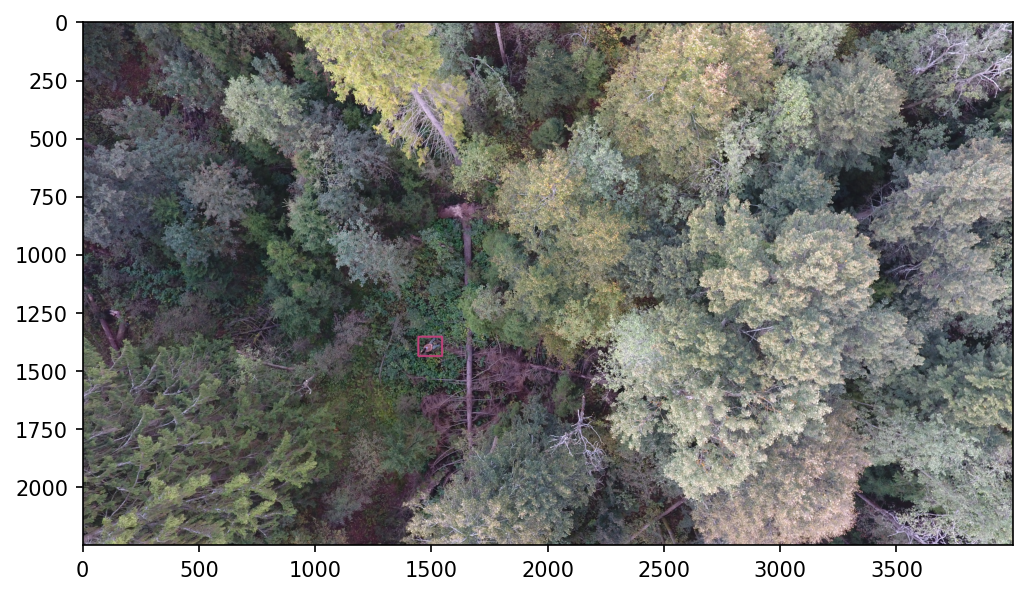

In [17]:
# print('Basic yolo inference:')
# visualize_results_usual_yolo_inference(
#     img,
#     model=model,
#     imgsz=640,
#     conf=0.5,
#     iou=0.7,
#     thickness=8,
#     show_boxes=True,
#     delta_colors=3,
#     show_class=False,
#     axis_off=False
# )

print('YOLO-Patch-Based-Inference:')
visualize_results(
    img=result.image,
    confidences=result.filtered_confidences,
    boxes=result.filtered_boxes,
    classes_ids=result.filtered_classes_id,
    classes_names=result.filtered_classes_names,
    thickness=8,
    show_boxes=True,
    delta_colors=3,
    show_class=False,
    axis_off=False
)

In [ ]:
element_crops = MakeCropsDetectThem(
    image=img,
    model_path=PATH_BEST,
    segment=False,
    show_crops=True,
    shape_x=640,
    shape_y=640,
    overlap_x=5,
    overlap_y=5,
    conf=0.5,
    iou=0.7,
    classes_list=[0],
)
result = CombineDetections(element_crops, nms_threshold=0.1)